# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("C:\\Users\\alcid\\GitHub\\Portfolio\\EBAC\\Dados\\previsao_de_renda.csv")
df = df.drop(axis=0,columns=[df.columns[0]])
ID = df.pop('index')

In [2]:
def grafico(target) -> None:
    
    figura = plt.figure(figsize=(15,20))
    figura.suptitle('Análise das variáveis qualitativas', fontsize=30)
    tamanho = (3,2)
    variavel = ['posse_de_imovel','posse_de_veiculo']
    flierprops = dict(marker='x', markerfacecolor='r', markersize=2,
                  linestyle='none', markeredgecolor='gold')
    target = target
    # Gráfico linha 1
    
                # Plot coluna 1
    ax = plt.subplot2grid(tamanho, (0,0))
    box = sns.boxplot(x = df[target] ,y = df[variavel[0]], ax=ax, orient='h', width=0.3,flierprops=flierprops) 
    
    for contador, classe in enumerate(df[variavel[0]].unique()):
        df_temporario = df.loc[df[variavel[0]] == classe]
    
        quantiles = df_temporario[target].quantile([0.25, 0.75]).values.tolist() # Separação dos quantiles.
        LI = quantiles[0] - ((quantiles[1] - quantiles[0])*1.5) # Definir limite inferior
        LS = quantiles[1] + ((quantiles[1] - quantiles[0])*1.5) # Definir limte superior
        if LI < df_temporario[target].min(): # Loop que vai reposicionar em caso de valores abaixo/acima do cálculado.
            LI = df_temporario[target].min()
        if LS > df_temporario[target].max():
            LS = df_temporario[target].max()

        posse = ['right', 'left'] # Reajustar a posição no boxplot.
        for ix,poss in zip([int(LI),int(LS)],posse): # Plotar no gráfico.
            box.annotate(round(ix,2), xy=(ix, 0.13 + contador), fontsize=8, color='black',horizontalalignment=poss)
        for ix,poss in zip(quantiles,posse):
            box.annotate(round(ix,2), xy=(ix, -0.17 + contador), fontsize=8, color='black',horizontalalignment=poss)
    
    box.set_xlim([-10000, df[target].max()])
    
                # Plot coluna 2
    ax = plt.subplot2grid(tamanho, (0,1))
    box = sns.boxplot(x = df[target] ,y = df[variavel[1]], ax=ax, orient='h', width=0.3,flierprops=flierprops)   
    for contador, classe in enumerate(df[variavel[1]].unique()):
        df_temporario = df.loc[df[variavel[0]] == classe]
    
        quantiles = df_temporario[target].quantile([0.25, 0.75]).values.tolist() # Separação dos quantiles.
        LI = quantiles[0] - ((quantiles[1] - quantiles[0])*1.5) # Definir limite inferior
        LS = quantiles[1] + ((quantiles[1] - quantiles[0])*1.5) # Definir limte superior
        if LI < df_temporario[target].min(): # Loop que vai reposicionar em caso de valores abaixo/acima do cálculado.
            LI = df_temporario[target].min()
        if LS > df_temporario[target].max():
            LS = df_temporario[target].max()

        posse = ['right', 'left'] # Reajustar a posição no boxplot.
        for ix,poss in zip([int(LI),int(LS)],posse): # Plotar no gráfico.
            box.annotate(round(ix,2), xy=(ix, 0.13 + contador), fontsize=8, color='black',horizontalalignment=poss)
        for ix,poss in zip(quantiles,posse):
            box.annotate(round(ix,2), xy=(ix, -0.17 + contador), fontsize=8, color='black',horizontalalignment=poss)
    box.set_xlim([-10000, df[target].max()])    
    # Gráfico linha 2
                # Plot coluna 1
    ax = plt.subplot2grid(tamanho, (1,0))
    hist = sns.histplot(x = df[target], hue = df[variavel[0]], ax=ax)    
    
    
                # Plot coluna 2
    ax = plt.subplot2grid(tamanho, (1,1))
    hist = sns.histplot(x = df[target], hue = df[variavel[1]], ax=ax)   
    
    # Gráfico linha 3
                # Plot coluna 1
    ax = plt.subplot2grid(tamanho, (2,0))
    point = sns.pointplot(y = df[target], x = df[variavel[0]], ax=ax)    
    
    
                # Plot coluna 2
    ax = plt.subplot2grid(tamanho, (2,1))
    point = sns.pointplot(y = df[target], x = df[variavel[1]], ax=ax)   

    return plt.show()



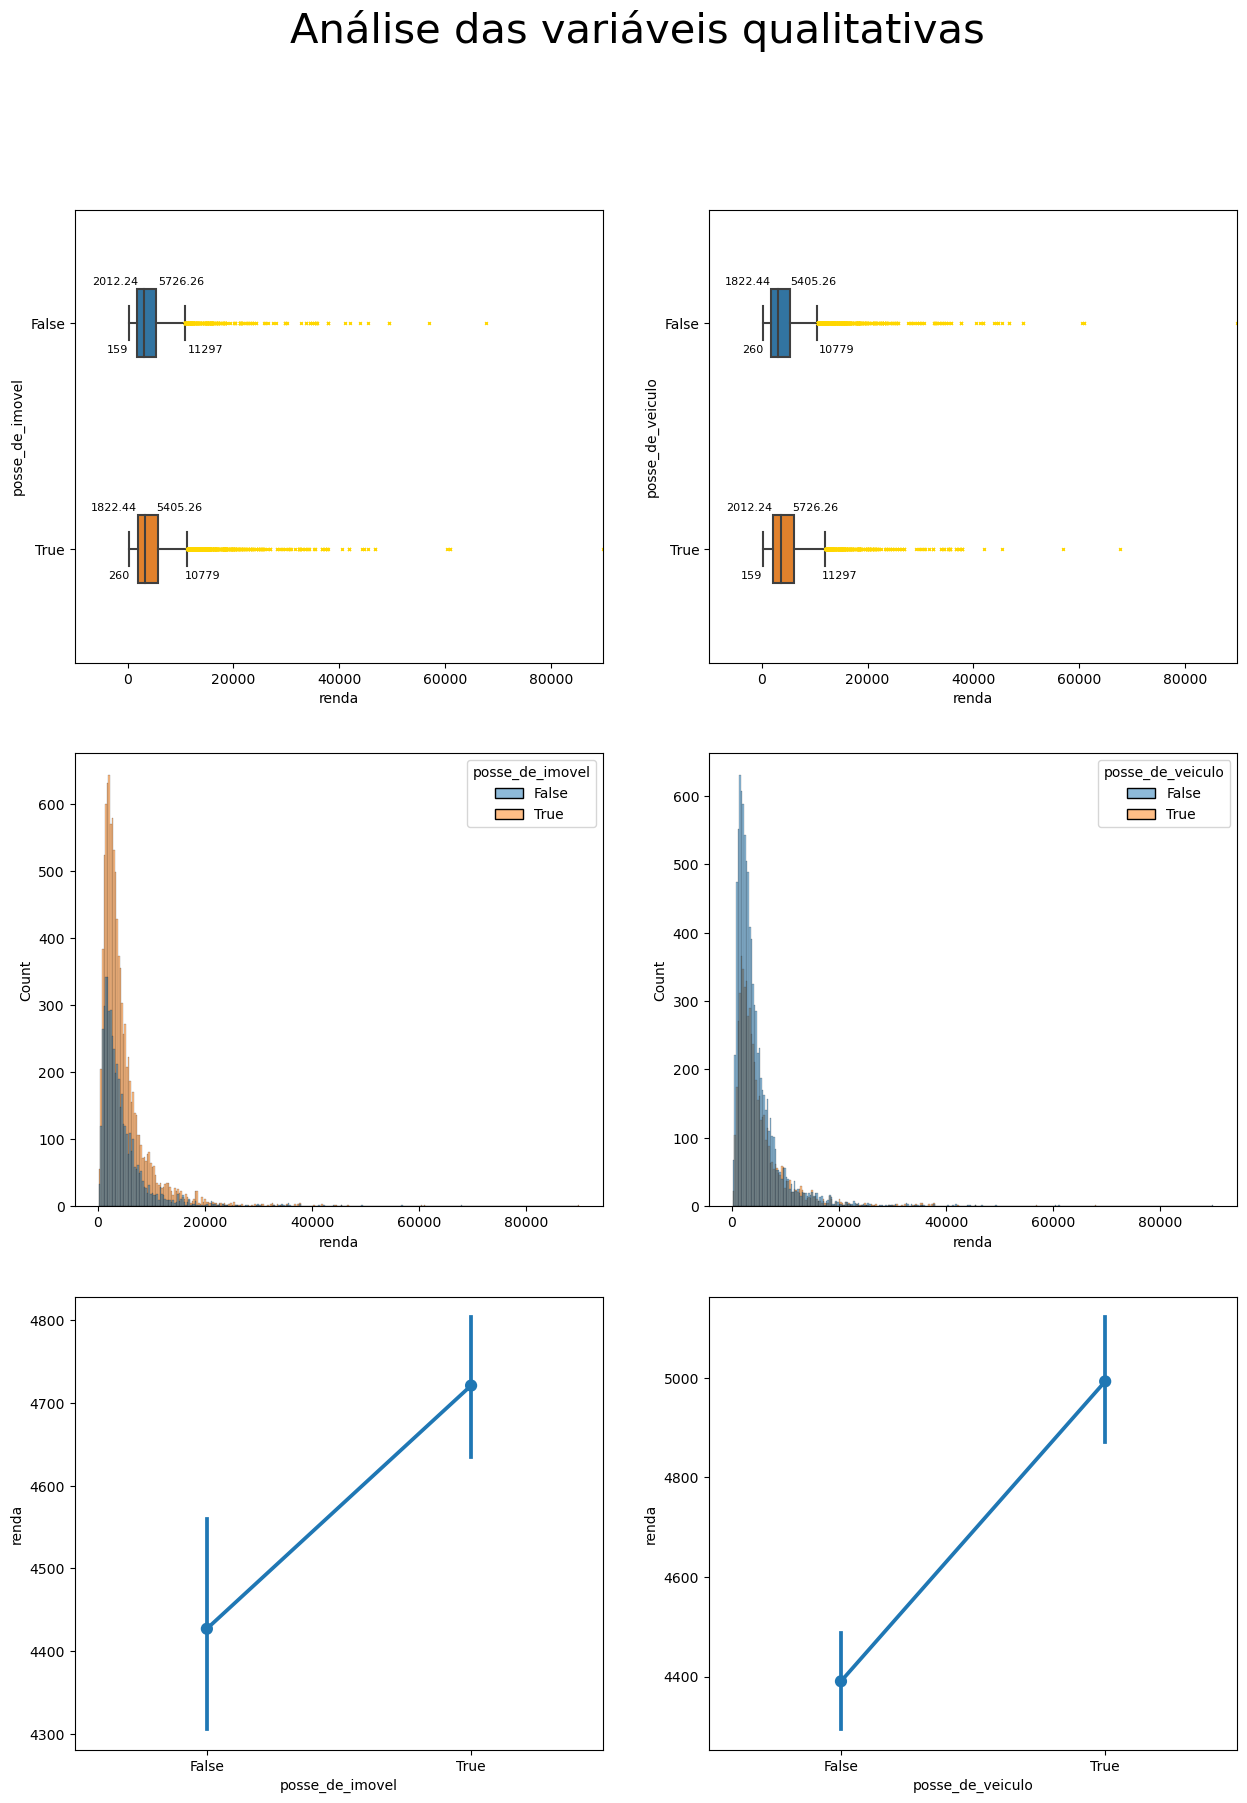

In [4]:
grafico('renda')

Aparentemente o modelo de posse de veículo aparesenta uma descriminação maior em relação as suas categorias sobre a renda.